In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
df_combined_IEO_IER = pd.read_csv("../../data/curated/affluence_cleaned/combined_IEO_IER.csv")

In [3]:
# Check for missing values
df_combined_IEO_IER = df_combined_IEO_IER.dropna()
print(df_combined_IEO_IER.isnull().sum())

SA2 code                         0
SA2 name                         0
IEO_Score                        0
IEO_State Rank                   0
IEO_State Decile                 0
IEO_State Percentile             0
IER_Usual Resident Population    0
IER_Score                        0
IER_State Rank                   0
IER_State Decile                 0
IER_State Percentile             0
dtype: int64


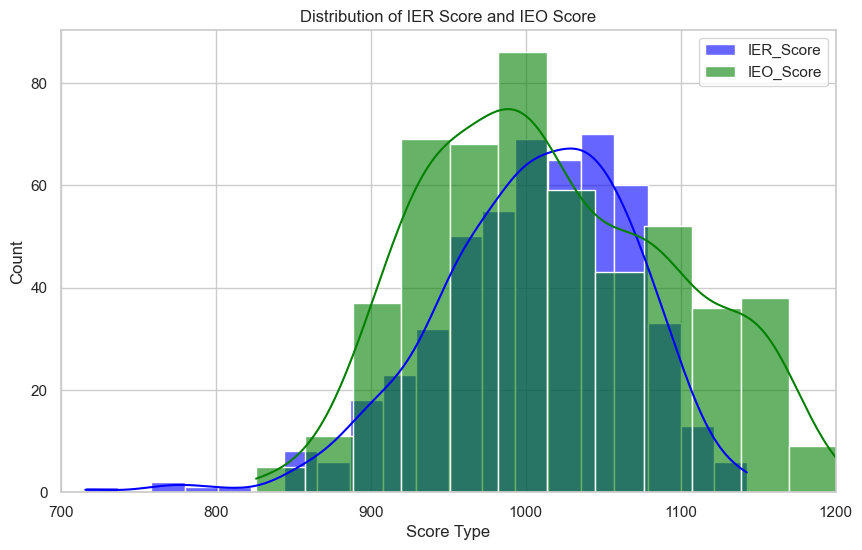

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_combined_IEO_IER['IER_Score'], kde=True, color='blue', label='IER_Score', alpha=0.6)
sns.histplot(df_combined_IEO_IER['IEO_Score'], kde=True, color='green', label='IEO_Score', alpha=0.6)
plt.title('Distribution of IER Score and IEO Score')
plt.xlabel('Score Type')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(700, 1200)
plt.show()


/var/folders/7y/_61szmys4tv1z_0tn5g37x7r0000gn/T/ipykernel_27843/3808367102.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined_IEO_IER.corr()


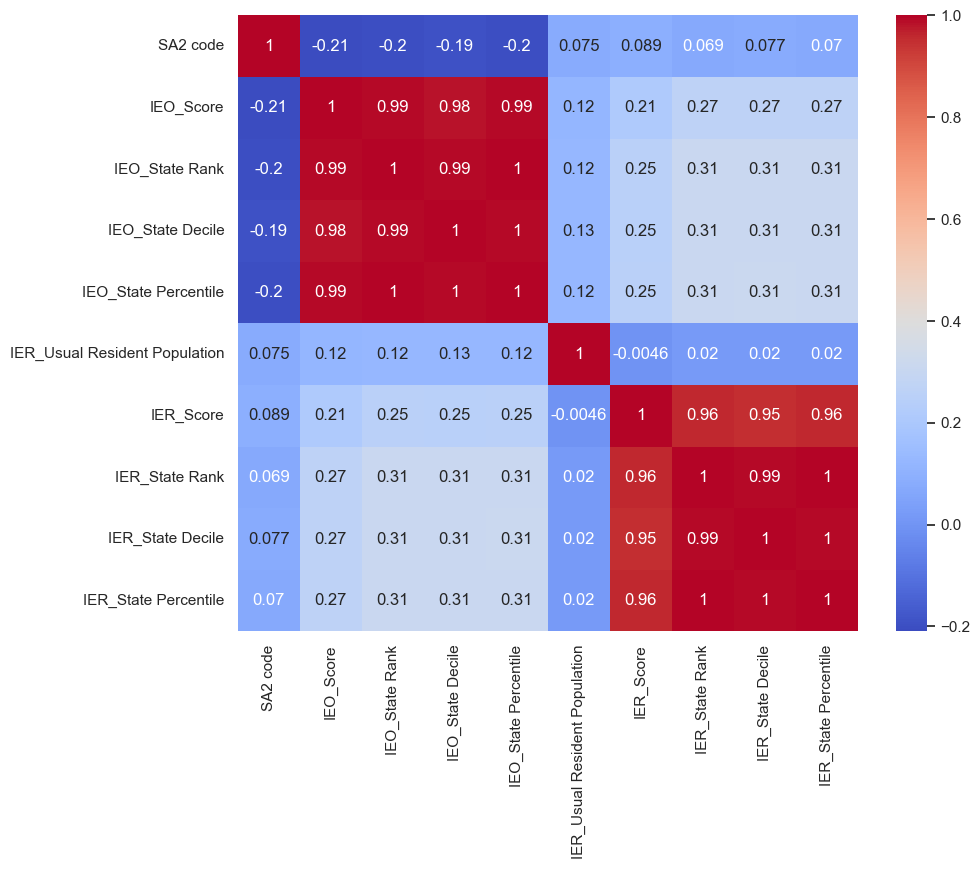

In [5]:
# Computed correlation matrix

correlation_matrix = df_combined_IEO_IER.corr()

# Visual correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


/opt/anaconda3/envs/ADS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


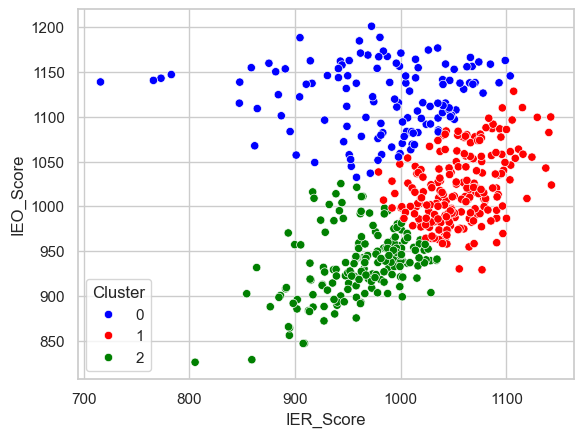

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)

# # Apply a clustering algorithm to the data set, using the two features IER_Score and IEO_Score
df_combined_IEO_IER['Cluster'] = kmeans.fit_predict(df_combined_IEO_IER[['IER_Score', 'IEO_Score']])

sns.scatterplot(data=df_combined_IEO_IER, x='IER_Score', y='IEO_Score', hue='Cluster', palette=['blue', 'red', 'green'])

plt.show()
